# Titanic Dataset: Exploratory Data Analysis¶

The dataset is meant for supervised machine learning, but we're only going to do some exploratory analysis at this stage.

We'll try to answer the following questions:

* Who were the passengers on the Titanic? (age, gender, class.. etc)
* What deck were the passengers on and how does that relate to their class?
* Where did the passengers come from?
* Who was alone and who was with family?
* What factors helped someone survive the sinking?

In [1]:
import pandas as pd
pd.options.display.max_columns = 100
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)

### Read the Data

In [2]:
data = pd.read_csv('data/train.csv')
data.columns = [c.lower() for c in data.columns]
y = data.survived

### Data Overview

In [3]:
data.head()

passengerid  survived  pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                name     sex   age  sibsp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   parch            ticket     fare cabin embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [4]:
print('The shape of the train dataset is {}'.format(data.shape))

The shape of the train dataset is (891, 12)


In [5]:
# Information about the dataset, useful for missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
passengerid    891 non-null int64
survived       891 non-null int64
pclass         891 non-null int64
name           891 non-null object
sex            891 non-null object
age            714 non-null float64
sibsp          891 non-null int64
parch          891 non-null int64
ticket         891 non-null object
fare           891 non-null float64
cabin          204 non-null object
embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In case the number of features is small we can easily understand that features **‘Age’, ‘Fare’, ‘Cabin’** and **‘Embarked’** contain missing values.

Total   Percent
cabin       687  0.771044
age         177  0.198653
embarked      2  0.002245
fare          0  0.000000
ticket        0  0.000000

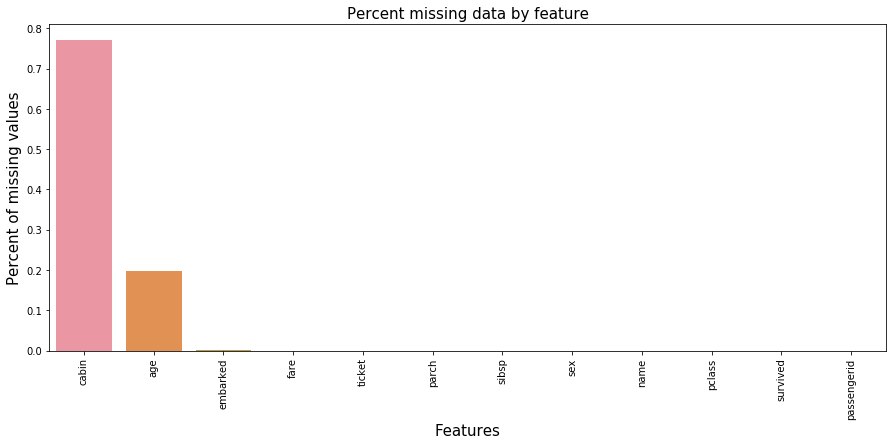

In [6]:
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
f, ax = plt.subplots(figsize=(15, 6))
plt.xticks(rotation='90')
sns.set_context("paper")
sns.barplot(x=missing_data.index, y=missing_data['Percent'])
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)
missing_data.head()

In [7]:
data.describe()

passengerid    survived      pclass         age       sibsp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            parch        fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

Pandas' describe method quickly gives us some aggregate stats for the dataset.

A 1 in the Survived column means that the person survived, while a 0 mean that they died. So looking at the mean, we can say that only ~38% people survived the sinking.Thus, the class sample sizes seems slightly unbalanced since 38% of observations belong in the minority class. One way to tackle this is to bias the classifier so that it pays more attention to the positive instances

### Let's examine linear correlation of the features

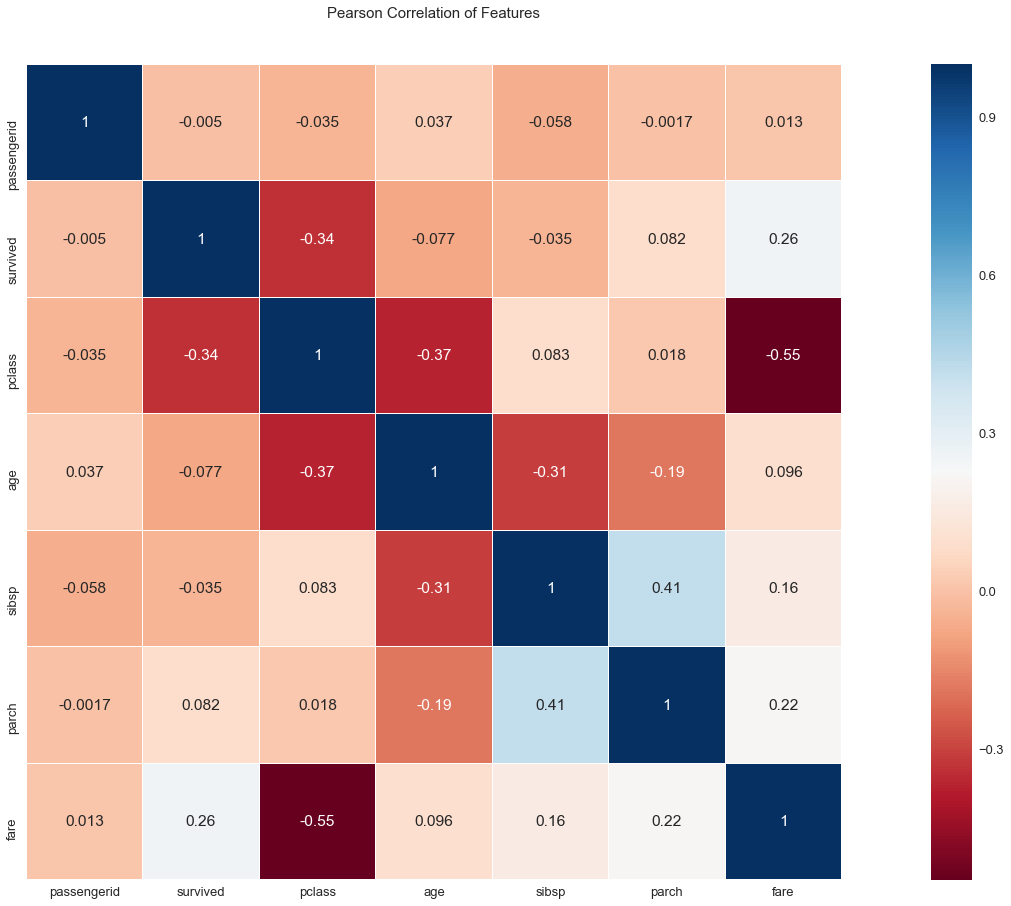

In [8]:
colormap = plt.cm.RdBu
sns.set(font_scale=1.3)
plt.figure(figsize=(32,15))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(data.corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)
# Note that the categorical features have been neglected in the
# correlation matrix.

We can cocnlude that outr target variable is slightly correlated with the features Pclass and Fare. However, remember that correlation is not causation.

### Quick overview of the dataset
Typically, some groups of people like women and children are more likely to survive than others. Having said that is useful to create one category for children.

In [9]:
#Using Pandas' apply method to create a new column "Person"
data['person'] = data.apply(lambda x: 'child' if x.age < 18 else x.sex,axis=1)
print(data.person.value_counts())

# specifies the parameters of our graphs
fig = plt.figure(figsize=(18,6), dpi=1600) 
alpha=alpha_scatterplot = 0.2 
alpha_bar_chart = 0.55

# lets us plot many diffrent shaped graphs together 
ax1 = plt.subplot2grid((2,3),(0,0))
# plots a bar graph of those who surived vs those who did not.               
data.person.value_counts().plot(kind='bar', alpha=alpha_bar_chart)
# puts a title on our graph
plt.title("Distribution of Male/Female")    

plt.subplot2grid((2,3),(0,1))
plt.scatter(data.survived, data.age, alpha=alpha_scatterplot)
# sets the y axis lable
plt.ylabel("Age")
# formats the grid line style of our graphs                          
plt.grid(b=True, which='major', axis='y')  
plt.title("Survival by Age,  (1 = Survived)")

ax3 = plt.subplot2grid((2,3),(0,2))
data.pclass.value_counts().plot(kind="barh", alpha=alpha_bar_chart)
ax3.set_ylim(-1, len(data.pclass.value_counts()))
plt.title("Class Distribution")

plt.subplot2grid((2,3),(1,0), colspan=2)
# plots a kernel density estimate of the subset of the 1st class passangers's age
data.age[data.pclass == 1].plot(kind='kde')    
data.age[data.pclass == 2].plot(kind='kde')
data.age[data.pclass == 3].plot(kind='kde')
 # plots an axis lable
plt.xlabel("Age")    
plt.title("Age Distribution within classes")
# sets our legend for our graph.
plt.legend(('1st Class', '2nd Class','3rd Class'),loc='best') 

ax5 = plt.subplot2grid((2,3),(1,2))
data.embarked.value_counts().plot(kind='bar', alpha=alpha_bar_chart)
ax5.set_xlim(-1, len(data.embarked.value_counts()))
# specifies the parameters of our graphs
plt.title("Passengers per boarding location")

male      519
female    259
child     113
Name: person, dtype: int64


Text(0.5,1,'Passengers per boarding location')

Unsurprisingly, there were considerably more male passengers onboard.
Let's take a look at how the passengers were divided among different classes.

Now, let's create a factorplot to check out the distribution of men, women and children belonging to different classes.

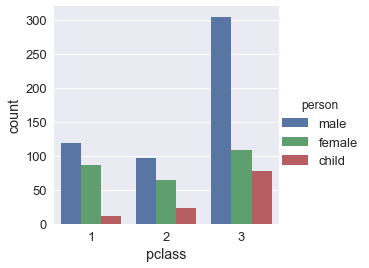

In [10]:
sns.factorplot('pclass',data=data,hue='person',kind='count')

Note that there are way more male passengers than woman or childeren, in the 3rd class, than any other class.
<br>We can quickly create a histogram from the dataset, to check out the distribution of passengers of different age groups.

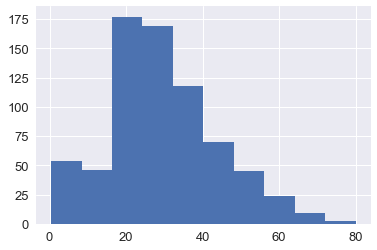

In [11]:
# prefered option as automatically ignore nan values otherwise we could have usesns.distplot(data.age.dropna())
data.age.hist() 

Let's check out how the age distribution varies for different classes. We'll use Seaborn's Facetgrid for this purpose.

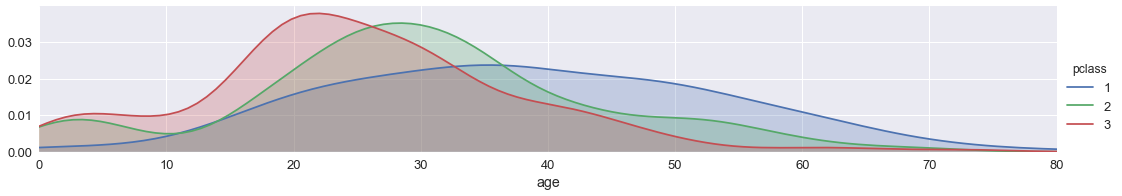

In [12]:
fig = sns.FacetGrid(data,hue='pclass',aspect=5)
fig.map(sns.kdeplot,'age',shade=True)
fig.set(xlim=(0,data.age.max()))
fig.add_legend()

As expected, the first class passengers belonged more to the middle age groups, with very few children while second and third class had more children, with relatively fewer older people.

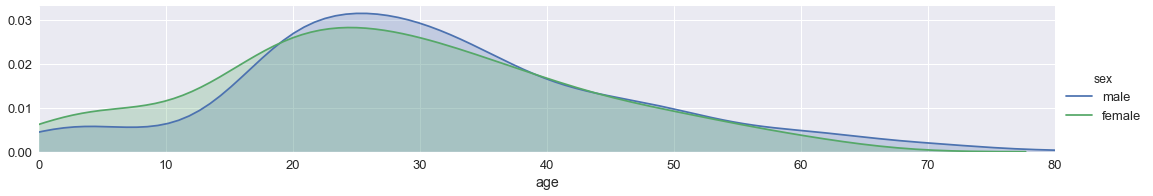

In [13]:
fig = sns.FacetGrid(data,hue='sex',aspect=5)
fig.map(sns.kdeplot,'age',shade=True)
fig.set(xlim=(0,data.age.max()))
fig.add_legend()

The age distribution seems similar for male and female passengers, though we can say that there are more younger females than younger males.

### What deck were the passengers on and how does that relate to their class?

Let's examine, if people belonging to higher classes were assigned cabins on a higher deck (or level) of the ship.
<br> The cabin number of a passenger is a combination of the deck they're on, and their room number. So a passenger on deck 'C' will have a cabin number in CXXX format, where XXX can be a room number.

<br>We just need to create a python method to extract first character from the cabin information.

In [14]:
deck_data = data[data.cabin.notnull()]
deck_data['level'] = deck_data.apply(lambda x:x.cabin[0],axis=1)
deck_data.head()

passengerid  survived  pclass  \
1             2         1       1   
3             4         1       1   
6             7         0       1   
10           11         1       3   
11           12         1       1   

                                                 name     sex   age  sibsp  \
1   Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
3        Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
6                             McCarthy, Mr. Timothy J    male  54.0      0   
10                    Sandstrom, Miss. Marguerite Rut  female   4.0      1   
11                           Bonnell, Miss. Elizabeth  female  58.0      0   

    parch    ticket     fare cabin embarked  person level  
1       0  PC 17599  71.2833   C85        C  female     C  
3       0    113803  53.1000  C123        S  female     C  
6       0     17463  51.8625   E46        S    male     E  
10      1   PP 9549  16.7000    G6        S   child     G  
11      0    113783  26.5500  C103        S  female     C

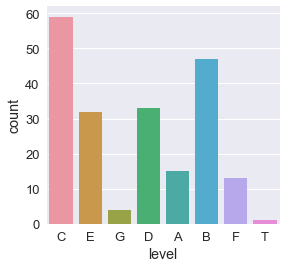

In [15]:
sns.factorplot('level',data=deck_data,kind='count')

Level C is the most frequent level.

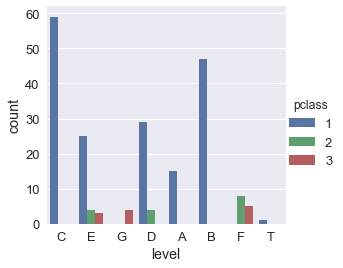

In [16]:
sns.factorplot('level',data=deck_data,hue='pclass',kind='count')

It seems that passengers belonging to the upper classes are indeed assigned to the upper decks. Decks A,B and C were assigned only to first class passengers, and we start seeing third class passengers only from level E. However,keep in mind that cabin information was missing for more than 3/4 of our passengers maybe those didn't have a cabin.

### Where did the passengers come from?

The Embarked feature contains data for the passengers' port of embarkation (C = Cherbourg; Q = Queenstown; S = Southampton).

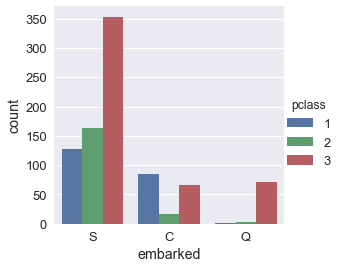

In [17]:
sns.factorplot('embarked',data=data,hue='pclass',kind='count')

Most of the passengers embarked from Southampton (including Jack and Rose, in the movie). What's also interesting, is that almost no first or second class passengers embarked from Queenstown, which can tell us something about the socio-economic status of the population of Queenstown.

### Who was with their family?

The SibsSP feature refers to the number of siblings or spouses that a passenger had aboard. Parch refers to the number of parents or children someone had on the ship.

<br>As we're just trying to know if a passenger had someone from his family onboard, we can make our life a bit easier by making another column to represent this data.

In [18]:
#Adding the number of family a passenger had onboard#Adding
data['alone'] = data.apply(lambda x: 'No' if x.sibsp + x.parch > 0 else 'Yes',axis=1)
data.head()

passengerid  survived  pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                name     sex   age  sibsp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   parch            ticket     fare cabin embarked  person alone  
0      0         A/5 21171   7.2500   NaN        S    male    No  
1      0          PC 17599  71.2833   C85        C  female    No  
2      0  STON/O2. 3101282   7.9250   NaN        S  female   Yes  
3      0            113803  53.1000  C123        S  female    No  
4      0            373450   8.0500   NaN        S    male   Yes

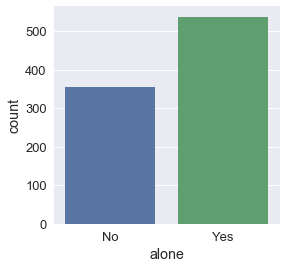

In [19]:
sns.factorplot('alone',data=data,kind='count')

We can conclude that the majority of people on the ship had family on the ship.

### What factors helped someone survive the sinking?

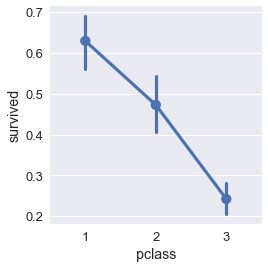

In [20]:
sns.factorplot('pclass','survived',data=data)

Unsurprisingly, lower class passengers had a lower chance of survival.
<br>But wait, we saw earlier that there were more men than woman or children, in the 3rd class than in any other class. However, priority to the lifeboats were given to women and children.
<br>Let's see if this is really the case, by using the 'Person' column as the hue in the factorplot.

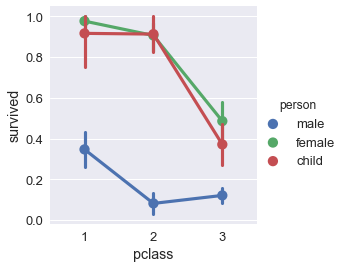

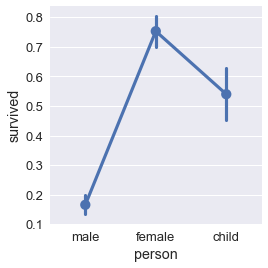

In [21]:
sns.factorplot('pclass','survived',hue='person',data=data)
sns.factorplot('person','survived',data=data)

Men had lower chances of survival than women and children, as they had lower priority of being saved.
<br>We can still generally say that men, women and children belonging to the 3rd class had a lesser chance at survival than their counterparts belonging to the 1st class.
<br>Let's see if there's a relation between the age and survival.

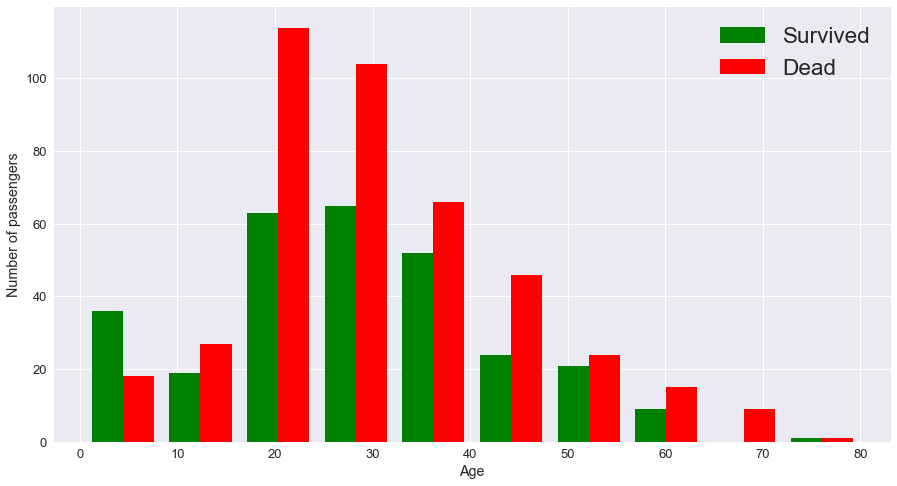

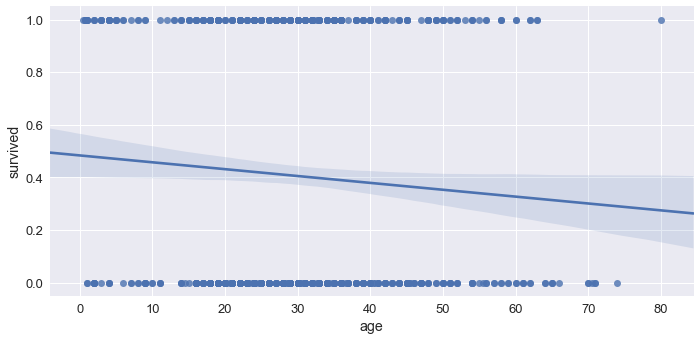

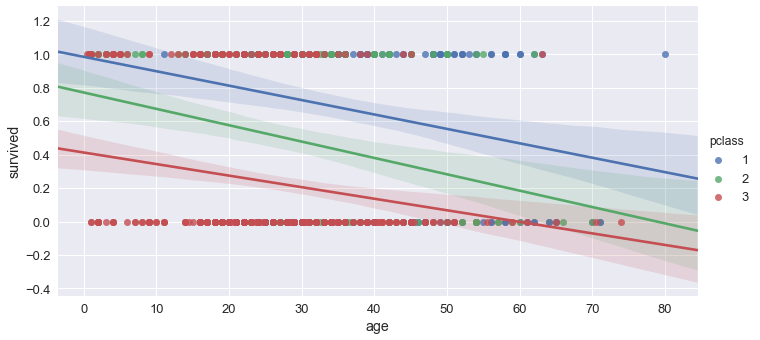

In [22]:
# dead and survived based on age of people
figure = plt.figure(figsize=(15,8))
plt.hist([data[data['survived']==1]['age'].dropna(),data[data['survived']==0]['age'].dropna()], color = ['g','r'],label = ['Survived','Dead'])
plt.xlabel('Age')
plt.ylabel('Number of passengers')
plt.legend(fontsize = 'x-large')
sns.lmplot('age','survived',data=data,aspect=2)
sns.lmplot('age','survived',hue='pclass',data=data,aspect=2)

The general conclusion from the above two figures seems to be that older people were less likely to survive.

- Those in the range 20-40 are more likely to be dead.
- Those in the range 70-80 are almost always dead.
- 0-20 there is not much diff i think
Making these as features would be a good idea?

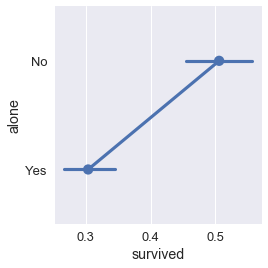

In [23]:
sns.factorplot('survived','alone',data=data)

And if you weren't alone on the ship, you had a higher chance of survival, than if you were all alone.
<br>Let's now focus on the Fare ticket of each passenger and see how it could impact the survival.

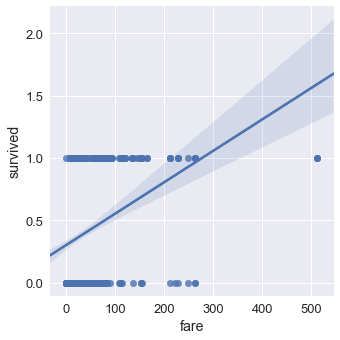

In [24]:
sns.lmplot('fare','survived',data=data)

Passengers with cheaper ticket fares are more likely to die. Put differently, passengers with more expensive tickets, and therefore a more important social status, seem to be rescued first.

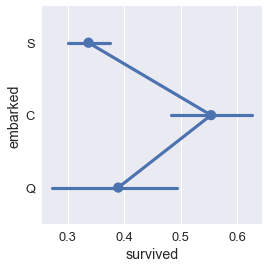

In [25]:
sns.factorplot('survived','embarked',data=data)

We observe that those embarked at Cherbourg have higher change of survival mainly this is because first class passengers are dominant in that port. 

(-1, 81.0)

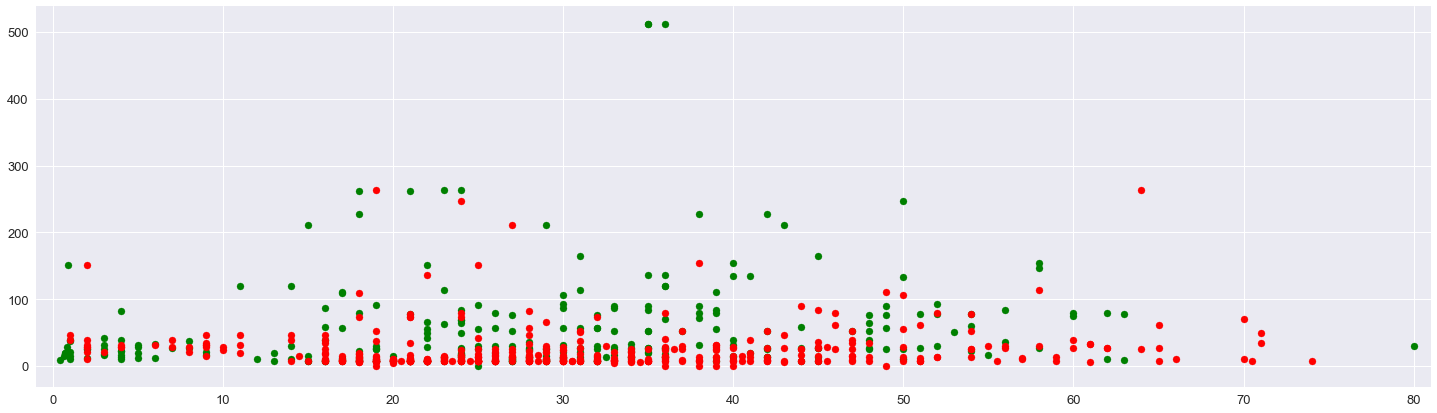

In [26]:
plt.figure(figsize=(25, 7))
ax = plt.subplot()

ax.scatter(data[data['survived'] == 1]['age'], data[data['survived'] == 1]['fare'], 
           c='green')
ax.scatter(data[data['survived'] == 0]['age'], data[data['survived'] == 0]['fare'], 
           c='red');
ax.set_xlim(-1, data.age.max()+1)

On the x-axis, we have the ages and the y-axis, we consider the ticket fare.Generally, those who survived are younger people and people with high fares

In order to examine the connection between the Name feature and survived; we will create a new feature.

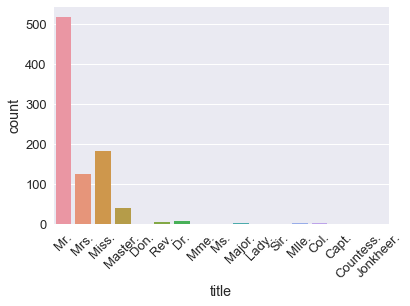

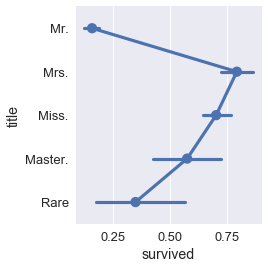

In [31]:
import re
data['title'] = data['name'].apply(lambda x: re.search('([A-Za-z]+)\.', x).group(0))
sns.countplot(x='title', data=data);
plt.xticks(rotation=45);
# Create a list with the most popular name's prefix
l                = ['Miss.','Master.','Mr.','Mrs.']
data['title'] = data['name'].apply(lambda x: re.search('([A-Za-z]+)\.', x).group(0))
data['title'] = data['title'].replace('Mlle.', 'Miss.')
data['title'] = data['title'].replace('Ms.', 'Miss.')
data['title'] = data['title'].replace('Mme.', 'Mrs.')
data['title'] = data['title'].apply(lambda x: 'Rare' if x not in l else x)  

sns.factorplot('survived','title',data=data)

Mr who mainly characterize men has a low survival rate while Mrs & Miss who mainly characterize women has a high survival rate.